                                         K-Means Clustering

**We are using KMeans clustering to form clusters of Youtube users based on their profile statistics.
The userstats statistics file is derived using the raw UserCrawl, VideoCrawl, calculated PageRank, and Calculated In_degress files. UserStats summerizes the overall profile of the user and assigning it a popularity score. This file was generated using Hadoop MapReduce.**

**The aim to cluster the users is to provide them information regarding their position in the network. WE use KMeans for this purpose.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import missingno as mnso
import seaborn as sns
import matplotlib.cm as cm

In [2]:
# load file
userstats=pd.read_csv(r"C:\Users\Manasi\Desktop\games\userstatistics.csv")

In [3]:
userstats.head()

,userID,TotalVideos,TotalViews,MaxViewedVideo,MaxViews,MinViewedVideo,MinViews,AvgViews,TotalLengthInMinutes,AvgRating,TotalRatings,TotalComments,MaxAgeInDays,MinAgeInDays,PopularityScore,TotalInDegree,friends
0,00000000000,1,155772,Mp0msya_knw,155772,Mp0msya_knw,155772,155772,321,4.830000,96,53,367,367,0.100000,12,0.0
1,000000000000,2,517754,gR8YwdzVaDg,504302,wvq-4bJnIlA,13452,491549,806,4.500000,414,279,529,525,0.827785,69,0.0
2,00000000000000000Jew,11,20883,hHs5h9MZwq8,5069,KHt615O218g,186,3813,3784,3.069091,227,303,763,0,0.764488,535,0.0
3,00000000000000000war,1,13,Wxh1Kiv5qxI,13,Wxh1Kiv5qxI,13,13,368,1.000000,1,1,761,761,0.100000,2,0.0
4,0000000000000000bomb,9,42173,mDjAvoNl9Jo,27200,MVQRGOi7irw,137,19884,2238,3.218888,170,150,706,0,0.152768,72,0.0


In [131]:
df=userstats[['TotalVideos','TotalViews','MaxViews','MinViews','AvgViews','TotalLengthInMinutes','AvgRating','TotalRatings','TotalComments','MaxAgeInDays','MinAgeInDays','PopularityScore','TotalInDegree','friends']]

In [132]:
df.head()

,TotalVideos,TotalViews,MaxViews,MinViews,AvgViews,TotalLengthInMinutes,AvgRating,TotalRatings,TotalComments,MaxAgeInDays,MinAgeInDays,PopularityScore,TotalInDegree,friends
0,1,155772,155772,155772,155772,321,4.830000,96,53,367,367,0.100000,12,0.0
1,2,517754,504302,13452,491549,806,4.500000,414,279,529,525,0.827785,69,0.0
2,11,20883,5069,186,3813,3784,3.069091,227,303,763,0,0.764488,535,0.0
3,1,13,13,13,13,368,1.000000,1,1,761,761,0.100000,2,0.0
4,9,42173,27200,137,19884,2238,3.218888,170,150,706,0,0.152768,72,0.0


In [142]:
corr=df.corr() # plot the correlation matrix

In [143]:
corr

,TotalVideos,TotalViews,MaxViews,MinViews,AvgViews,TotalLengthInMinutes,AvgRating,TotalRatings,TotalComments,MaxAgeInDays,MinAgeInDays,PopularityScore,TotalInDegree,friends
TotalVideos,1.000000,0.384872,0.121776,-0.016925,0.055832,0.136729,0.060259,0.362375,0.346583,0.084566,-0.091942,0.034290,0.811553,0.088609
TotalViews,0.384872,1.000000,0.466698,0.118044,0.342195,0.049031,0.028971,0.912401,0.831537,0.002759,-0.045709,0.133019,0.672641,0.088462
MaxViews,0.121776,0.466698,1.000000,0.449969,0.977480,0.016524,0.065925,0.367062,0.347764,-0.026178,-0.094905,0.401144,0.265064,0.074767
MinViews,-0.016925,0.118044,0.449969,1.000000,0.506832,-0.002164,0.052872,0.058690,0.048273,-0.069659,-0.047636,0.429394,0.026874,0.000842
AvgViews,0.055832,0.342195,0.977480,0.506832,1.000000,0.007577,0.063617,0.238572,0.219080,-0.035174,-0.088837,0.421923,0.161261,0.047002
TotalLengthInMinutes,0.136729,0.049031,0.016524,-0.002164,0.007577,1.000000,0.011086,0.047373,0.046017,0.010904,-0.013598,0.006124,0.116399,0.011795
AvgRating,0.060259,0.028971,0.065925,0.052872,0.063617,0.011086,1.000000,0.023484,0.023840,-0.009941,-0.068122,0.128013,0.066986,0.020615
TotalRatings,0.362375,0.912401,0.367062,0.058690,0.238572,0.047373,0.023484,1.000000,0.925405,0.008008,-0.033539,0.100946,0.652313,0.173298
TotalComments,0.346583,0.831537,0.347764,0.048273,0.219080,0.046017,0.023840,0.925405,1.000000,0.014765,-0.031663,0.101616,0.609220,0.184665
MaxAgeInDays,0.084566,0.002759,-0.026178,-0.069659,-0.035174,0.010904,-0.009941,0.008008,0.014765,1.000000,0.818709,-0.121608,0.023088,0.035948


In [144]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

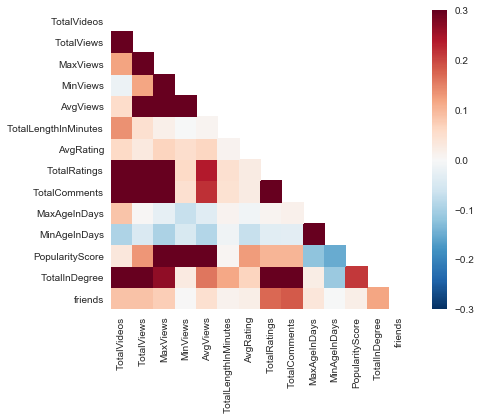

In [145]:
plt.show()

**We will first determine the number of clusters using the elbow graph. silhouette graphs and dendrograms are also plotted to cross validate.Initially we train on a subset of the data of 2000 records.**

In [139]:
df_trimmed=df.sample(2000)

** Plot the elbow curve with trimmed data**

In [146]:
collist=[]
for c in df.columns:
    collist.append(c)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8


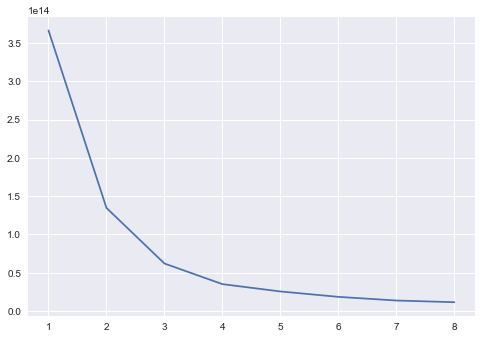

In [147]:
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(df_trimmed[collist], maxK=9)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


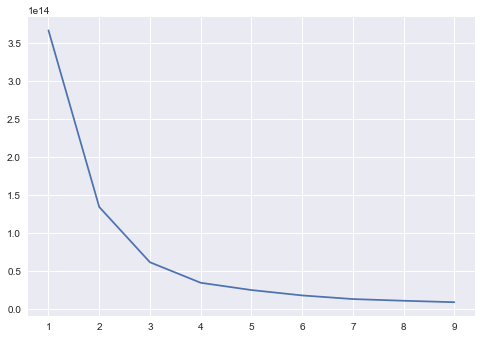

In [148]:
elbow_plot(df_trimmed[collist], maxK=10)

**According to the elbow curve a kink is observed near 3, 4 **
** Next, we try it on the entire dataset.At k=4 the graph begins to flatten significantly. This point where the graph starts to smooth out is the prophesied “elbow” for which we have been looking. **

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


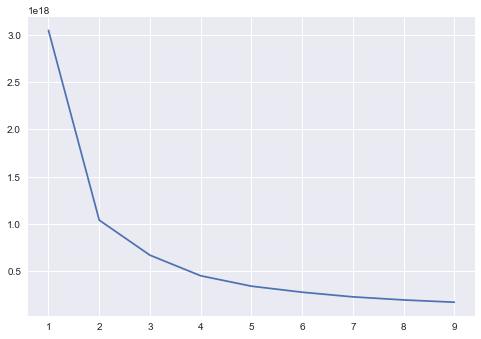

In [48]:
# on all the samples
elbow_plot(df[collist], maxK=10)

** We remove the higly corelated features in the data and plot the elbow curve to determine feature correlation impact**

In [150]:
df_trimmed_feat=df_trimmed[['TotalVideos','AvgRating','MaxAgeInDays','PopularityScore']]

In [151]:
corr1=df_trimmed_feat.corr()

In [152]:
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr1, mask=mask, vmax=.3, square=True)

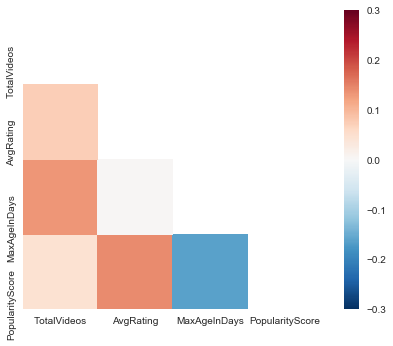

In [153]:
plt.show()

In [ ]:
#TRIAL TWO

In [154]:
collist=[]
for c in df_trimmed_feat.columns:
    collist.append(c)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


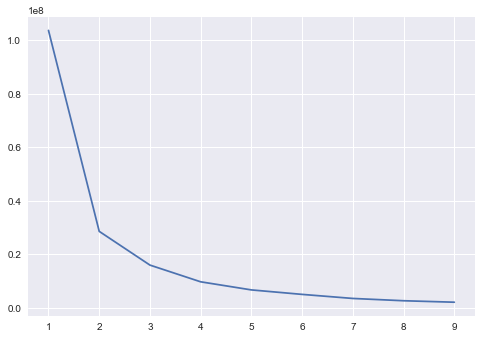

In [155]:
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(df_trimmed_feat[collist], maxK=10)

**At k=3 the graph begins to flatten significantly. This point where the graph starts to smooth out is the prophesied “elbow” for which we have been looking.**

## ---- dendrogram ----
The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_trimmed)

In [29]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [128]:
sns.clustermap(X_scaled,cmap="Blues", robust=True,metric='euclidean')

C:\Users\Manasi\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


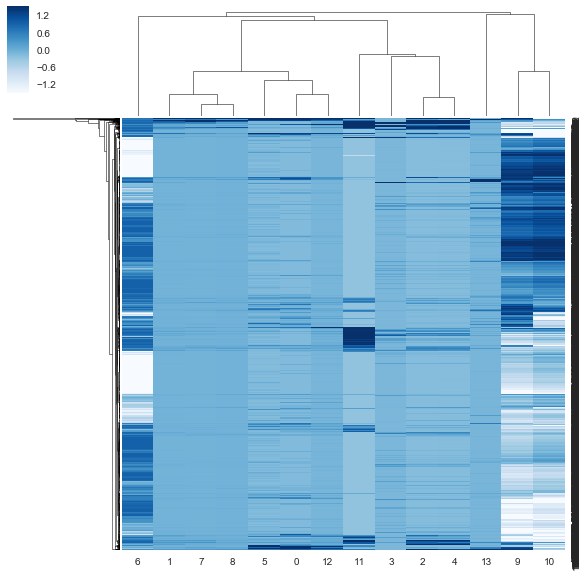

In [129]:
plt.show()

## cluster determination -- elbow curve

Elbow curve with data points and cluster errors. At k=3 the graphs shows very less variance, foming the elbow

In [99]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(df_trimmed)
    cluster_errors.append( clusters.inertia_ )

In [100]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [101]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,4.785501e+14,1
1,2.151442e+14,2
2,1.014742e+14,3
3,6.493205e+13,4
4,4.167900e+13,5
5,3.353616e+13,6
6,2.337054e+13,7
7,1.805024e+13,8
8,1.459985e+13,9


In [102]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

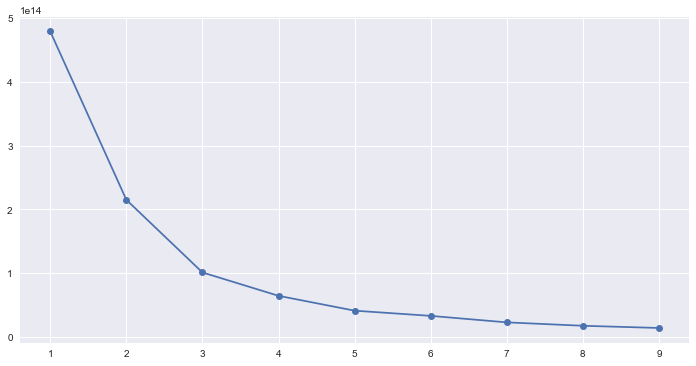

In [103]:
plt.show()

## -- Silhouette (clustering) --
Silhouette refers to a method of interpretation and validation of consistency within clusters of data.The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [98]:
from sklearn.metrics import silhouette_samples, silhouette_score

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.82659847925


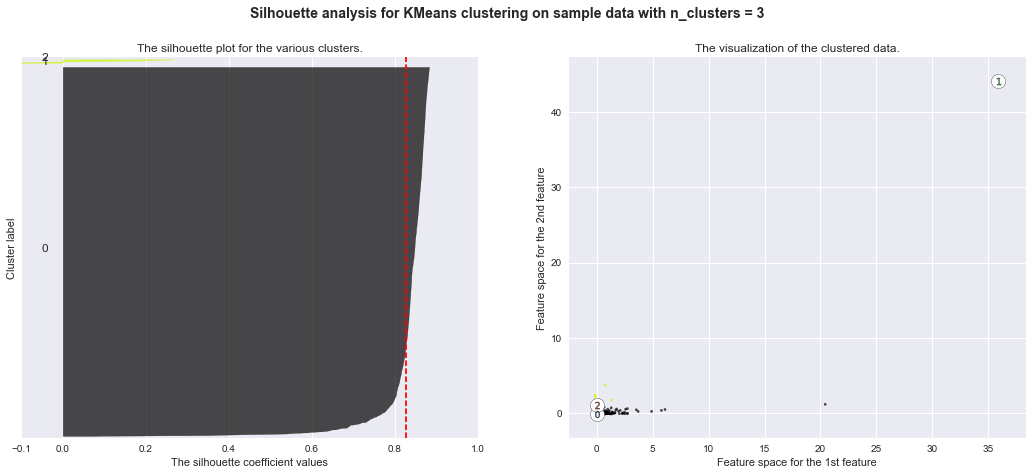

For n_clusters = 4 The average silhouette_score is : 0.310775468988


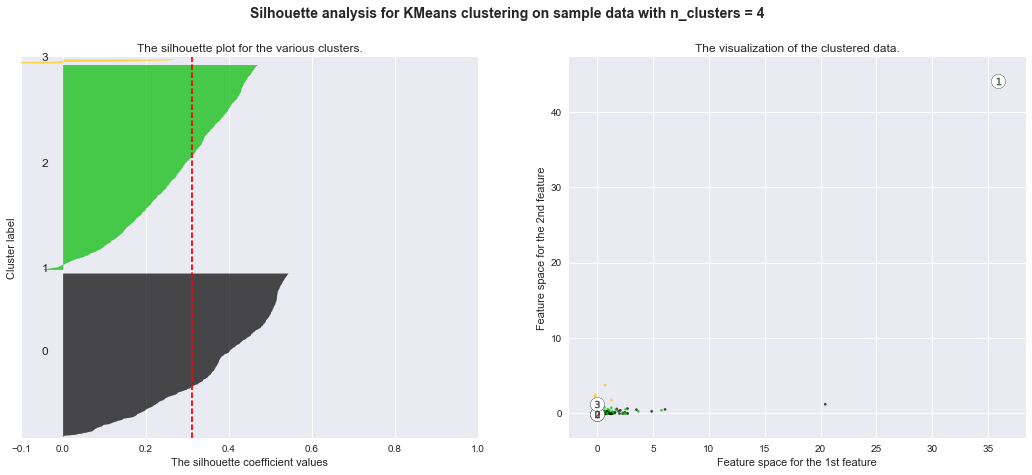

For n_clusters = 5 The average silhouette_score is : 0.315956187766


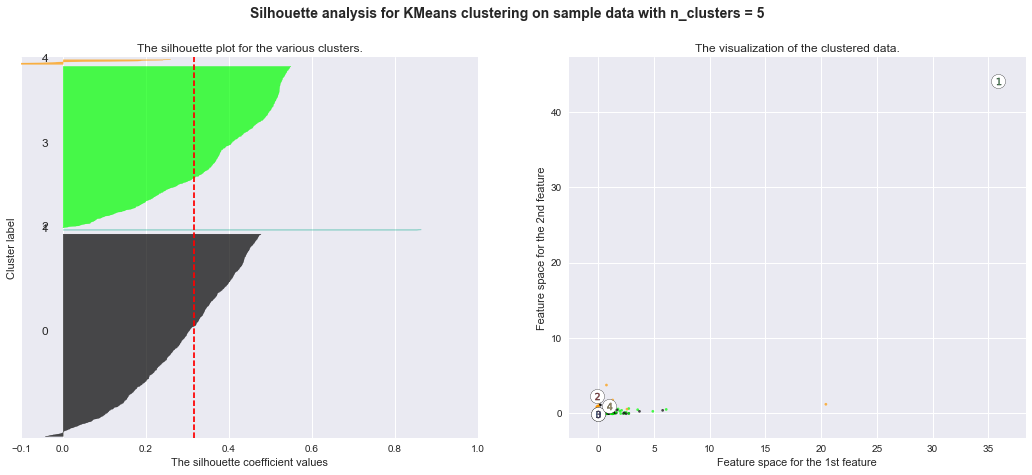

For n_clusters = 6 The average silhouette_score is : 0.316235288854


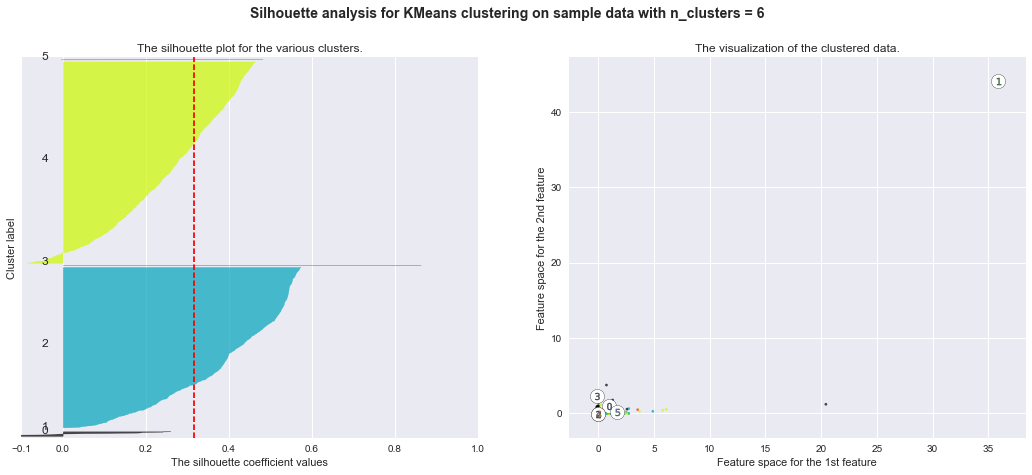

In [125]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_scaled
range_n_clusters = [3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
Plot 4 to 6 are bad pick as the score is way below the mean. Plot with n = 3 has a 0.8 score and can be considered.